In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [4]:
emot = pd.read_table('train.txt', sep=';', names=['prompt', 'emotion'])

emot.head()

,prompt,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
emot['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

<AxesSubplot:xlabel='emotion', ylabel='count'>

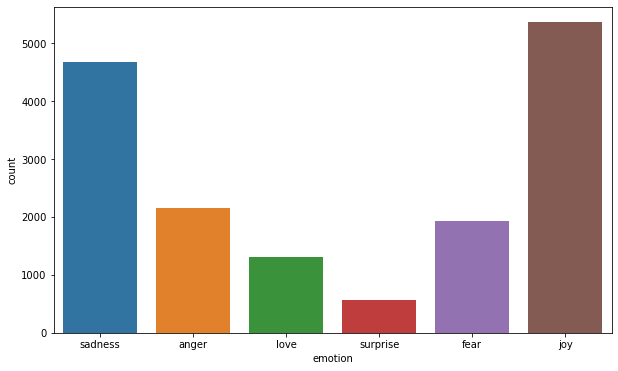

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='emotion', data=emot)

In [11]:
from nltk.corpus import stopwords
import string

In [12]:
def text_pre(text):
    nopunc = [c for c in text if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word not in stopwords.words('english')]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [18]:
pl = Pipeline([
    ('bow', CountVectorizer(analyzer=text_pre)),
    ('tfidf', TfidfTransformer()),
    ('classify', MultinomialNB())
])

In [19]:
X = emot['prompt']
y = emot['emotion']

In [20]:
pl.fit(X, y)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_pre at 0x000001E56636DA60>)),
                ('tfidf', TfidfTransformer()), ('classify', MultinomialNB())])

In [22]:
testemot = pd.read_csv('test.txt', sep=';', names=['prompt', 'emotion'])

testemot.head()

,prompt,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [23]:
X_test = testemot['prompt']
y_test = testemot['emotion']

In [25]:
predictions = pl.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       anger       0.95      0.29      0.45       275
        fear       0.91      0.30      0.45       224
         joy       0.65      0.98      0.78       695
        love       1.00      0.05      0.10       159
     sadness       0.68      0.91      0.78       581
    surprise       0.00      0.00      0.00        66

    accuracy                           0.68      2000
   macro avg       0.70      0.42      0.43      2000
weighted avg       0.73      0.68      0.62      2000



C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Without TfIdf

In [28]:
pl2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_pre)),
    ('classify', MultinomialNB())
])

In [29]:
pl2.fit(X, y)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_pre at 0x000001E56636DA60>)),
                ('classify', MultinomialNB())])

In [30]:
predictions2 = pl2.predict(X_test)

In [34]:
print(predictions2)

['sadness' 'sadness' 'sadness' ... 'joy' 'joy' 'joy']


In [31]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

       anger       0.92      0.64      0.76       275
        fear       0.83      0.61      0.70       224
         joy       0.77      0.97      0.85       695
        love       0.91      0.33      0.48       159
     sadness       0.76      0.93      0.84       581
    surprise       1.00      0.05      0.09        66

    accuracy                           0.79      2000
   macro avg       0.87      0.59      0.62      2000
weighted avg       0.81      0.79      0.76      2000



In [56]:
print(pl2.predict(['kill', 'wow', 'romantic', 'bitter']))

['sadness' 'joy' 'love' 'anger']
